# Dataset analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import utils

In [2]:
features_1 = [
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]



In [3]:
path = "./tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

Had to change her label in tctodd1 in his_hers. Otherwise 96 labels instead of 95.
vedere se le varie label di his_hers sono statisticamente simili (che vuol dire statisticamente? boh guardiamo media e dev. std)

In [4]:
df = pd.DataFrame(data, columns=['label', 'time_series'])
print(df['label'].value_counts())
df.head()

0     27
60    27
69    27
68    27
67    27
      ..
29    27
28    27
27    27
26    27
94    27
Name: label, Length: 95, dtype: int64


,label,time_series
0,0,"[[-0.064909, 0.034318, -0.043964, 0.626383, 0...."
1,0,"[[-0.107059, -0.126109, -0.053742, 0.612516, 0..."
2,0,"[[-0.061427, -0.082576, -0.102991, 0.735469, 0..."
3,1,"[[-0.128178, 0.02695, -0.050126, 0.455028, 0.4..."
4,1,"[[-0.143672, -0.144416, -0.047447, 0.660979, 0..."


In [8]:
np.mean(df['time_series'].iloc[0], axis=0)

array([-0.12359908,  0.02004841, -0.04530714,  0.47213429,  0.53506589,
        0.49491324,  0.17544914,  0.19811941,  0.17947179,  0.20405468,
        0.21601179,  0.07842527,  0.06782231, -0.03748164,  0.38855008,
        0.5130405 ,  0.55184169,  0.19595423,  0.05150761,  0.18715093,
        0.1726928 ,  0.33196956])

In [9]:
lengths = []
for i in range(len(df)):
    lengths.append(df.iloc[i]['time_series'].shape[0])
print(np.mean(lengths))

57.29005847953216


In [10]:
import sklearn as sk
from sklearn.model_selection import train_test_split
seed = 0

# Shuffle the dataframe
shuffled_df = sk.utils.shuffle(df, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(shuffled_df['time_series'], shuffled_df['label'], stratify=shuffled_df['label'],  train_size=.9, random_state=seed)

In [14]:
y_train

2348    22
1622    65
1024    56
64      21
1000    48
        ..
1598    57
2359    26
1248    36
2026    10
2198    67
Name: label, Length: 2308, dtype: int64

In [15]:
X_train

2348    [[-0.024224, -0.123052, -0.227617, 0.778565, 0...
1622    [[-0.041294, -0.112548, -0.17107, 0.544781, 0....
1024    [[-0.064984, -0.167229, -0.178276, 0.598836, 0...
64      [[-0.138224, 0.012796, -0.102947, 0.574892, 0....
1000    [[-0.068824, -0.150351, -0.179839, 0.598384, 0...
                              ...                        
1598    [[-0.054778, -0.175772, -0.135305, 0.582868, 0...
2359    [[-0.090707, -0.109077, -0.205158, 0.813344, 0...
1248    [[-0.031, -0.146997, -0.211754, 0.615255, 0.24...
2026    [[-0.10335, -0.074662, -0.146925, 0.634079, 0....
2198    [[-0.063121, -0.116498, -0.144782, 0.90114, 0....
Name: time_series, Length: 2308, dtype: object

In [8]:
unique, counts = np.unique(y_train.values, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 24]
 [ 1 24]
 [ 2 25]
 [ 3 24]
 [ 4 24]
 [ 5 24]
 [ 6 25]
 [ 7 25]
 [ 8 25]
 [ 9 24]
 [10 24]
 [11 24]
 [12 24]
 [13 25]
 [14 24]
 [15 24]
 [16 25]
 [17 24]
 [18 24]
 [19 24]
 [20 24]
 [21 24]
 [22 25]
 [23 24]
 [24 25]
 [25 24]
 [26 25]
 [27 24]
 [28 24]
 [29 24]
 [30 25]
 [31 24]
 [32 24]
 [33 25]
 [34 24]
 [35 24]
 [36 24]
 [37 24]
 [38 24]
 [39 24]
 [40 24]
 [41 24]
 [42 25]
 [43 25]
 [44 24]
 [45 25]
 [46 24]
 [47 24]
 [48 25]
 [49 24]
 [50 24]
 [51 25]
 [52 24]
 [53 24]
 [54 24]
 [55 24]
 [56 25]
 [57 24]
 [58 24]
 [59 24]
 [60 25]
 [61 25]
 [62 25]
 [63 24]
 [64 24]
 [65 24]
 [66 24]
 [67 24]
 [68 24]
 [69 24]
 [70 24]
 [71 24]
 [72 24]
 [73 25]
 [74 25]
 [75 24]
 [76 25]
 [77 24]
 [78 24]
 [79 25]
 [80 25]
 [81 24]
 [82 24]
 [83 24]
 [84 24]
 [85 24]
 [86 24]
 [87 24]
 [88 25]
 [89 24]
 [90 25]
 [91 24]
 [92 24]
 [93 24]
 [94 25]]


In [9]:
unique, counts = np.unique(y_test.values, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0  3]
 [ 1  3]
 [ 2  2]
 [ 3  3]
 [ 4  3]
 [ 5  3]
 [ 6  2]
 [ 7  2]
 [ 8  2]
 [ 9  3]
 [10  3]
 [11  3]
 [12  3]
 [13  2]
 [14  3]
 [15  3]
 [16  2]
 [17  3]
 [18  3]
 [19  3]
 [20  3]
 [21  3]
 [22  2]
 [23  3]
 [24  2]
 [25  3]
 [26  2]
 [27  3]
 [28  3]
 [29  3]
 [30  2]
 [31  3]
 [32  3]
 [33  2]
 [34  3]
 [35  3]
 [36  3]
 [37  3]
 [38  3]
 [39  3]
 [40  3]
 [41  3]
 [42  2]
 [43  2]
 [44  3]
 [45  2]
 [46  3]
 [47  3]
 [48  2]
 [49  3]
 [50  3]
 [51  2]
 [52  3]
 [53  3]
 [54  3]
 [55  3]
 [56  2]
 [57  3]
 [58  3]
 [59  3]
 [60  2]
 [61  2]
 [62  2]
 [63  3]
 [64  3]
 [65  3]
 [66  3]
 [67  3]
 [68  3]
 [69  3]
 [70  3]
 [71  3]
 [72  3]
 [73  2]
 [74  2]
 [75  3]
 [76  2]
 [77  3]
 [78  3]
 [79  2]
 [80  2]
 [81  3]
 [82  3]
 [83  3]
 [84  3]
 [85  3]
 [86  3]
 [87  3]
 [88  2]
 [89  3]
 [90  2]
 [91  3]
 [92  3]
 [93  3]
 [94  2]]


In [5]:
# each row of the Series object is an array. Classifiers won't read it. We create a matrix of values.
def from_series_to_matrix(num_predictors:int, time_series:pd.Series) -> np.ndarray:
    """Function used to transform the pandas Series to a matrix.
    Used to feed classifiers.

    Args:
        num_predictors (int): numbers of predictors
        time_series (pd.Series): time series data

    Returns:
        np.ndarray: NxM matrix where:
        - N is the number of examples
        - M is the number of predictors
    """
    a = np.zeros(shape=(len(time_series), num_predictors))
    for i in range(len(time_series)):
        for j in range(num_predictors):
            a[i,j] = time_series.iloc[i][j]
    return a

# compute_mean_feature_vector used to compute baseline
def compute_mean_feature_vector(time_series:pd.Series) -> np.ndarray:
    """Compute the mean of each field of each time series example

    Args:
        time_series (pd.Series): time series

    Returns:
        np.ndarray: feature vector for each entry
    """
    num_predictors = time_series.iloc[0].shape[-1]
    return from_series_to_matrix(num_predictors, time_series.apply(lambda x: np.mean(x, axis=0)))

X_train_mean_fv = compute_mean_feature_vector(X_train)
X_test_mean_fv = compute_mean_feature_vector(X_test)

NameError: name 'X_train' is not defined

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
SC.fit(X_train_mean_fv)
matrix_X_train_mean_fv_scaled = SC.transform(X_train_mean_fv)
matrix_X_test_mean_fv_scaled = SC.transform(X_test_mean_fv)



In [12]:
import logging
logging.basicConfig(filename="logfilename.log", level=logging.INFO)


In [13]:
import itertools
from tqdm import tqdm
best_acc_score = 0
best_combination = ''
params = [['linear', 'poly', 'rbf', 'sigmoid'], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],[2, 3, 5, 6, 8, 9, 11, 13, 15, 17, 20, 25, 30]]
params_comb = list(itertools.product(*params))
max_iter=100
for params in tqdm(params_comb, desc='calculating diff params combinations..'):
    try:
        svc = SVC(kernel=params[0], C=params[1], gamma = params[2], degree= params[3], max_iter=max_iter)
        svc.fit(matrix_X_train_mean_fv_scaled, y_train.values)
        predictions = svc.predict(matrix_X_test_mean_fv_scaled)
        res = accuracy_score(y_test.values, predictions)
        if res > best_acc_score:
            best_acc_score = res
            best_combination = f'kernel:{params[0]}, C={params[1]}, gamma={params[2]}, degree={params[3]}.'
            logging.info(f'[SCORE] found new best acc score! {best_acc_score}, best combination: {best_combination}')
    except:
        logging.info(f'[SKIP] skipping the following parameters: kernel={params[0]}, C={params[1]}, gamma={params[2]}, degree={params[3]}')
        continue
print(f'best accuracy score: {best_acc_score}, best combination: {best_combination}')

calculating diff params combinations..:   8%|▊         | 351/4212 [02:13<25:10,  2.56it/s]/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
calculating diff params combinations..:   8%|▊         | 352/4212 [02:13<23:15,  2.77it/s]/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
calculating diff params combinations..:   8%|▊         | 353/4212 [02:13<21:56,  2.93it/s]/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
calc

best accuracy score: 0.867704280155642, best combination: kernel:linear, C=10, gamma=1e-05, degree=2.


In [15]:
params = dict(enumerate(params_comb))[1129]
svc = SVC(kernel=params[0], C=params[1], gamma = params[2], degree= params[3], verbose=True, max_iter=30)
svc.fit(matrix_X_train_mean_fv_scaled, y_train.values)
predictions = svc.predict(matrix_X_test_mean_fv_scaled)
res = accuracy_score(y_test.values, predictions)


[LibSVM]*
optimization finished, #iter = 9
obj = nan, rho = 1.000076
nSV = 5, nBSV = 0
*
optimization finished, #iter = 20
obj = nan, rho = nan
nSV = 5, nBSV = 1
*
optimization finished, #iter = 9
obj = nan, rho = 1.000076
nSV = 5, nBSV = 0
*
optimization finished, #iter = 9
obj = nan, rho = 1.000064
nSV = 6, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = nan
nSV = 5, nBSV = 2
*
optimization finished, #iter = 20
obj = nan, rho = nan
nSV = 5, nBSV = 1
*
optimization finished, #iter = 19
obj = nan, rho = nan
nSV = 6, nBSV = 1
*
optimization finished, #iter = 9
obj = nan, rho = 1.000076
nSV = 5, nBSV = 0
*
optimization finished, #iter = 9
obj = nan, rho = 1.000076
nSV = 5, nBSV = 0
*
optimization finished, #iter = 6
obj = nan, rho = nan
nSV = 4, nBSV = 4
*
optimization finished, #iter = 9
obj = nan, rho = 1.000076
nSV = 5, nBSV = 0
*
optimization finished, #iter = 20
obj = nan, rho = nan
nSV = 5, nBSV = 1
*
optimization finished, #iter = 2

/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = nan
nSV = 15, nBSV = 1
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = -11174476482650627268076636209152.000000
nSV = 22, nBSV = 2
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = 3055496697695359488.000000
nSV = 15, nBSV = 2
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = -0.720541
nSV = 25, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = nan
nSV = 14, nBSV = 1
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = -0.000000, rho = -0.857811
nSV = 24, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = -0.390232
nSV = 20, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 30
obj = nan, rho = 1.007572
nSV = 21, nBSV = 0
WARN: libsvm Solver reached max_ite

ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

-------------
# K-EROS

In [6]:
def compute_S_matrix(ts_series:pd.Series, means:np.array, vars:np.array) -> tuple:
    """function to compute the S matrix of shape n x N (n = number of predictors, N = number of examples). 
    Such matrix will be used to compute
    the weight vector needed by Eros norm

    Args:
        -ts_series (pd.Series): Series containing the dataset of time series.
        Each entry is a list of vectors. 
        Each vector is a component of the i-th time series
        -means (np.array): array containing the means of the features in order to scale them
        -vars (np.array): array containing the vars of the features in order to scale them

    Returns:
        tuple[np.array, list]: returns the matrix S and the list of
        right eigenvectors matrices computed for each time series
    """
    s_matrix = np.zeros(shape=(len(ts_series), ts_series.iloc[0].shape[-1]))
    v_list = [] # list of right eigenvector matrix
    for i in range(len(ts_series)):
        ts = ts_series.iloc[i] # time x predictors
        #The matrix S will be nxN where n is the predictor dimension and N is the number of time-series examples.
        #Hence, we will use the transpose to compute the covariance matrix.
        ts = (ts - means)/vars
        ts = ts.T # predictors x time
        #Compute the covariance matrix of the i-th example of the dataset
        #cov_ts = np.corrcoef(ts)
        cov_ts = np.cov(ts)
        # Compute the SVD of the covariance matrix
        u, s, v_t = np.linalg.svd(cov_ts)
        s_matrix[i] = s
        v_list.append(v_t.T)
    return s_matrix.T, v_list

In [26]:
X_train_matrix = np.vstack(X_train)
means_train = np.mean(X_train_matrix, axis=0)
vars_train = np.var(X_train_matrix, axis=0)

In [27]:
means_train, vars_train

(array([-0.05552374, -0.11289002, -0.13787006,  0.59797003,  0.30809794,
         0.46319201,  0.08904312,  0.05249049,  0.03018527,  0.05478745,
         0.0710108 ,  0.05099855, -0.04383498, -0.1204966 ,  0.43707669,
         0.39037003,  0.54879382,  0.28033495,  0.05691277,  0.22594754,
         0.13801296,  0.26404592]),
 array([0.00188294, 0.00639601, 0.00431505, 0.00793959, 0.01775536,
        0.00275456, 0.05224821, 0.02878818, 0.02108311, 0.03239591,
        0.03702743, 0.00397724, 0.01943236, 0.00798253, 0.00815517,
        0.02802097, 0.00769526, 0.13196413, 0.04176523, 0.12569881,
        0.0930127 , 0.12833541]))

In [28]:
S, v_list_train = compute_S_matrix(X_train, means_train, vars_train)

In [29]:
_, v_list_test = compute_S_matrix(X_test, means_train, vars_train)

In [7]:
def compute_weight_vector(S:np.ndarray, aggregation:str='mean', algorithm:int=1) -> np.array:
    """compute the weight vector used in the computation of Eros norm

    Args:
        S (np.ndarray): matrix containing eigenvalues of each predictor
        aggregation (str, optional): aggregation function to use. Defaults to 'mean'.
        algorithm(int): choose the algorithm to use to compute weight vector.
        - Algorithm 1: do not normalize rows of the S matrix. Perform directly the computation of w
        - Algorithm 2: first normalize rows of the S matrix and then compute w.
    Returns:
        np.array: return the normalized weight vector
    """
    n = S.shape[0] # number of predictors
    if (algorithm == 2):
        # first normalize each eigenvalues
        S = S/np.sum(S, axis=0)
    if (aggregation == 'mean'):
        w = np.mean(S, axis=-1)
    elif (aggregation == 'min'):
        w = np.min(S, axis=-1)
    elif (aggregation == 'max'):
        w = np.max(S, axis=-1)
    return w/np.sum(w)

In [31]:
w = compute_weight_vector(S, algorithm=2)

In [8]:
def eros_norm(weight_vector:np.array, A:np.array, B:np.array):
    """compute eros norm

    Args:
        weight_vector (np.array): weight vector
        A (np.array): time_series_1
        B (np.array): time_series_2

    Returns:
        float: distance between the 2 time series. Bounded in (0,1]
    """
    # since we want to use a_i and b_i which 
    # are the orthonormal column vectors of A and B,
    # we decide to transpose A and B
    A = A.T
    B = B.T
    n = A.shape[0] # number of predictors

    
    eros = 0
    
    for i in range(n):
        eros += weight_vector[i]*np.abs(np.dot(A[i], B[i]))
    return eros

def compute_kernel_matrix(num_examples:int, weight_vector:np.array, v_list:list) -> np.array:
    """compute the kernel matrix to be used in PCA

    Args:
        num_examples (int): number of examples in the dataset
        weight_vector (np.array): weight vector 
        v_t_list (list[np.array]): list of right eigenvector matrices

    Returns:
        np.array: kernel matrix with pairwise eros norm
    """
    N = num_examples
    K_eros = np.zeros(shape=(N,N))

    for i in range(N):
        j = 0
        while (j <= i):
            K_eros[i,j] = eros_norm(weight_vector, v_list[i], v_list[j])
            if (i != j): 
                K_eros[j,i] = K_eros[i,j]
            j += 1

    # check whether the kernel matrix is positive semi definite (PSD) or not
    is_psd = np.all(np.linalg.eigvals(K_eros) >= 0)
    #is_psd = True
    print(np.min(np.linalg.eigvals(K_eros)))
    threshold = 1e-10
    # if not PSD, add to the diagonal the minimal value among eigenvalues of K_eros
    if is_psd == False:
        delta = np.min(np.linalg.eigvals(K_eros))
        delta_ary = [np.abs(delta) + threshold for _ in range(K_eros.shape[0])]
        K_eros += np.diag(delta_ary)
    is_psd = np.all(np.linalg.eigvals(K_eros) >= 0)
    if is_psd == True:
        print("now PSD")
    else:
        print("not PSD")
    return K_eros

def perform_PCA(num_examples:int, weight_vector:np.array, v_list:list) -> tuple:
    """extract principal components in the feature space

    Args:
        num_examples (int): number of examples in the dataset
        weight_vector (np.array): weight vector 
        v_t_list (list[np.array]): list of right eigenvector matrices

    Returns:
        tuple[np.ndarray, np.array]:
        - K_eros matrix
        - eigenvectors (principal components) of the feature space
    """
    K_eros = compute_kernel_matrix(num_examples, weight_vector, v_list)
    O = np.ones(shape=(num_examples,num_examples))
    O *= 1/num_examples
    K_eros_mc = K_eros - O@K_eros - K_eros@O + O@K_eros@O # K_eros mean centered
    is_psd = np.all(np.linalg.eigvals(K_eros_mc) >= 0)
    print(f"K eros mean centered is {'not ' if not is_psd else ''}PSD")
    
    ####### added #######
    threshold = 10e-10
    if is_psd == False:
        delta = np.min(np.linalg.eigvals(K_eros_mc))
        delta_ary = [np.abs(delta) + threshold for _ in range(K_eros_mc.shape[0])]
        K_eros_mc += np.diag(delta_ary)
    is_psd = np.all(np.linalg.eigvals(K_eros_mc) >= 0)
    print(f"K eros mean centered is {'not ' if not is_psd else ''}PSD")
    ####### added #######
    
    
    eig_vals, eig_vecs = np.linalg.eig(K_eros_mc)
    #return K_eros, eig_vecs, eig_vals
    
    ####### added #######
    return K_eros_mc, eig_vecs, eig_vals
    ####### added #######
     

def project_test_data(num_training_examples:int, num_test_examples:int, weight_vector:np.array, v_list_train:list, v_list_test:list, K_eros_train:np.ndarray, V:np.ndarray) -> tuple:
    """compute the K eros test kernel matrix used to project test data

    Args:
        num_examples_train (int): number of examples in the training dataset
        num_examples_test (int): number of examples in the test dataset
        weight_vector (np.array): weight vector 
        v_list_train (list[np.array]): list of right eigenvector matrices of the training dataset
        v_list_test (list[np.array]): list of right eigenvector matrices of the test dataset

    Returns:
        np.array: kernel matrix with pairwise eros norm
    """
    N_train = num_training_examples
    N_test = num_test_examples
    K_eros_test = np.zeros(shape=(N_test,N_train))

    for i in range(N_test):
        for j in range(N_train):
            K_eros_test[i,j] = eros_norm(weight_vector, v_list_test[i], v_list_train[j])
    
    O_test = np.ones(shape=(N_test, N_train))*(1/N_train)
    O_train = np.ones(shape=(N_train, N_train))*(1/N_train)

    K_eros_test_mc = K_eros_test - O_test@K_eros_train - K_eros_test@O_train + O_test@K_eros_train@O_train

    Y = K_eros_test_mc @ V
    
    # return Y, K_eros_test
    return Y, K_eros_test_mc

In [40]:
# K_eros_train, V, eig_vals = perform_PCA(len(X_train), weight_vector=w, v_list=v_list_train)
K_eros_train_mc, V, eig_vals = perform_PCA(len(X_train), weight_vector=w, v_list=v_list_train)

-27.709596103409464
now PSD
K eros mean centered is not PSD
K eros mean centered is PSD


In [47]:
# Y, K_eros_test = project_test_data(len(X_train), len(X_test), w, v_list_train, v_list_test, K_eros_train, V)
Y, K_eros_test_mc = project_test_data(len(X_train), len(X_test), w, v_list_train, v_list_test, K_eros_train_mc, V)

In [48]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=None, kernel='precomputed')
principal_comps_train = kpca.fit_transform(K_eros_train_mc)
principal_comps_test = kpca.transform(K_eros_test_mc)



In [30]:
V.shape, Y.shape

((2308, 2308), (257, 2308))

In [42]:
import logging
logging.basicConfig(filename="eros_mean_centered.log", level=logging.INFO)

In [26]:
# K_eros_train NOT MEAN CENTERED
'''import itertools
from tqdm import tqdm
best_acc_score = 0
best_combination = ''
params = [['linear', 'poly', 'rbf', 'sigmoid'], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],[15,16, 17, 20, 22, 23, 24, 25, 26, 27, 28, 30]]
params_comb = list(itertools.product(*params))
for params in tqdm(params_comb, desc='calculating diff params combinations..'):
    svc = SVC(kernel=params[0], C=params[1], gamma = params[2], degree= params[3])
    princ_components = V[:, :51]
    svc.fit(princ_components, y_train.values)
    test_princ_components = Y[:, :51]
    predictions = svc.predict(test_princ_components)
    res = accuracy_score(y_test.values, predictions)
    if res > best_acc_score:
        best_acc_score = res
        best_combination = f'kernel:{params[0]}, C={params[1]}, gamma={params[2]}, degree={params[3]}.'
        print(f'found new best acc score! {best_acc_score}, best combination: {best_combination}')
print(f'best accuracy score: {best_acc_score}, best combination: {best_combination}')'''

calculating diff params combinations..:   0%|          | 1/3888 [00:00<30:02,  2.16it/s]

found new best acc score! 0.19066147859922178, best combination: kernel:linear, C=1e-05, gamma=1e-05, degree=15.


calculating diff params combinations..:  11%|█         | 433/3888 [03:02<23:23,  2.46it/s]

found new best acc score! 0.2140077821011673, best combination: kernel:linear, C=0.1, gamma=1e-05, degree=15.


calculating diff params combinations..:  14%|█▍        | 541/3888 [03:48<23:47,  2.34it/s]

found new best acc score! 0.6653696498054474, best combination: kernel:linear, C=1, gamma=1e-05, degree=15.


calculating diff params combinations..:  17%|█▋        | 649/3888 [04:34<22:54,  2.36it/s]

found new best acc score! 0.7003891050583657, best combination: kernel:linear, C=2, gamma=1e-05, degree=15.


calculating diff params combinations..:  27%|██▋       | 1057/3888 [07:08<21:00,  2.25it/s]

found new best acc score! 0.7859922178988327, best combination: kernel:poly, C=1e-05, gamma=5, degree=15.


calculating diff params combinations..:  27%|██▋       | 1058/3888 [07:09<20:58,  2.25it/s]

found new best acc score! 0.7976653696498055, best combination: kernel:poly, C=1e-05, gamma=5, degree=16.


calculating diff params combinations..:  27%|██▋       | 1060/3888 [07:10<21:14,  2.22it/s]

found new best acc score! 0.8093385214007782, best combination: kernel:poly, C=1e-05, gamma=5, degree=20.


calculating diff params combinations..:  27%|██▋       | 1061/3888 [07:10<22:09,  2.13it/s]

found new best acc score! 0.8132295719844358, best combination: kernel:poly, C=1e-05, gamma=5, degree=22.


calculating diff params combinations..:  27%|██▋       | 1062/3888 [07:11<22:13,  2.12it/s]

found new best acc score! 0.8171206225680934, best combination: kernel:poly, C=1e-05, gamma=5, degree=23.


calculating diff params combinations..:  31%|███       | 1188/3888 [08:11<21:35,  2.08it/s]

found new best acc score! 0.8210116731517509, best combination: kernel:poly, C=0.0001, gamma=10, degree=30.


calculating diff params combinations..: 100%|██████████| 3888/3888 [31:57<00:00,  2.03it/s]

best accuracy score: 0.8210116731517509, best combination: kernel:poly, C=0.0001, gamma=10, degree=30.


In [43]:
# MEAN CENTERED
import itertools
from tqdm import tqdm
best_acc_score = 0
best_combination = ''
params = [['linear', 'poly', 'rbf', 'sigmoid'], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],[15,16, 17, 20, 22, 23, 24, 25, 26, 27, 28, 30]]
params_comb = list(itertools.product(*params))
for params in tqdm(params_comb, desc='calculating diff params combinations...'):
    svc = SVC(kernel=params[0], C=params[1], gamma = params[2], degree= params[3])
    princ_components = V[:, :51]
    svc.fit(princ_components, y_train.values)
    test_princ_components = Y[:, :51]
    predictions = svc.predict(test_princ_components)
    res = accuracy_score(y_test.values, predictions)
    if res > best_acc_score:
        best_acc_score = res
        best_combination = f'kernel:{params[0]}, C={params[1]}, gamma={params[2]}, degree={params[3]}.'
        logging.info(f'[EROS-MEAN-CENTERED] found new best acc score! {best_acc_score}, best combination: {best_combination}')
        print(f'found new best acc score! {best_acc_score}, best combination: {best_combination}')
print(f'best accuracy score: {best_acc_score}, best combination: {best_combination}')

calculating diff params combinations...:   0%|          | 1/3888 [00:00<31:07,  2.08it/s]

found new best acc score! 0.20233463035019456, best combination: kernel:linear, C=1e-05, gamma=1e-05, degree=15.


calculating diff params combinations...:  11%|█         | 433/3888 [03:10<27:34,  2.09it/s]

found new best acc score! 0.22957198443579765, best combination: kernel:linear, C=0.1, gamma=1e-05, degree=15.


calculating diff params combinations...:  14%|█▍        | 541/3888 [03:59<24:36,  2.27it/s]

found new best acc score! 0.6770428015564203, best combination: kernel:linear, C=1, gamma=1e-05, degree=15.


calculating diff params combinations...:  17%|█▋        | 649/3888 [04:49<24:31,  2.20it/s]

found new best acc score! 0.7354085603112841, best combination: kernel:linear, C=2, gamma=1e-05, degree=15.


calculating diff params combinations...:  19%|█▉        | 757/3888 [05:37<21:40,  2.41it/s]

found new best acc score! 0.7470817120622568, best combination: kernel:linear, C=5, gamma=1e-05, degree=15.


calculating diff params combinations...:  27%|██▋       | 1057/3888 [07:30<23:04,  2.04it/s]

found new best acc score! 0.8754863813229572, best combination: kernel:poly, C=1e-05, gamma=5, degree=15.


calculating diff params combinations...:  27%|██▋       | 1058/3888 [07:31<23:10,  2.03it/s]

found new best acc score! 0.8871595330739299, best combination: kernel:poly, C=1e-05, gamma=5, degree=16.


calculating diff params combinations...:  27%|██▋       | 1061/3888 [07:32<22:16,  2.11it/s]

found new best acc score! 0.8910505836575876, best combination: kernel:poly, C=1e-05, gamma=5, degree=22.


calculating diff params combinations...:  27%|██▋       | 1062/3888 [07:32<22:12,  2.12it/s]

found new best acc score! 0.8949416342412452, best combination: kernel:poly, C=1e-05, gamma=5, degree=23.


calculating diff params combinations...: 100%|██████████| 3888/3888 [32:55<00:00,  1.97it/s]

best accuracy score: 0.8949416342412452, best combination: kernel:poly, C=1e-05, gamma=5, degree=23.


In [36]:
'''import itertools
from tqdm import tqdm
best_acc_score = 0
best_combination = ''
params = [['linear', 'poly', 'rbf', 'sigmoid'], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],[15,16, 17, 20, 22, 23, 24, 25, 26, 27, 28, 30]]
params_comb = list(itertools.product(*params))
for params in tqdm(params_comb, desc='calculating diff params combinations..'):
    svc = SVC(kernel=params[0], C=params[1], gamma = params[2], degree= params[3])
    svc.fit(principal_comps_train[:,:51], y_train.values)
    predictions = svc.predict(principal_comps_test[:,:51])
    res = accuracy_score(y_test.values, predictions)
    if res > best_acc_score:
        best_acc_score = res
        best_combination = f'kernel:{params[0]}, C={params[1]}, gamma={params[2]}, degree={params[3]}.'
        print(f'found new best acc score! {best_acc_score}, best combination: {best_combination}')
print(f'best accuracy score: {best_acc_score}, best combination: {best_combination}')'''

calculating diff params combinations..:   0%|          | 1/3888 [00:00<45:12,  1.43it/s]

found new best acc score! 0.19455252918287938, best combination: kernel:linear, C=1e-05, gamma=1e-05, degree=15.


calculating diff params combinations..:  11%|█         | 433/3888 [04:57<38:35,  1.49it/s]

found new best acc score! 0.5875486381322957, best combination: kernel:linear, C=0.1, gamma=1e-05, degree=15.


calculating diff params combinations..:  14%|█▍        | 541/3888 [05:53<25:08,  2.22it/s]

found new best acc score! 0.7898832684824902, best combination: kernel:linear, C=1, gamma=1e-05, degree=15.


calculating diff params combinations..:  17%|█▋        | 649/3888 [06:32<18:45,  2.88it/s]

found new best acc score! 0.7937743190661478, best combination: kernel:linear, C=2, gamma=1e-05, degree=15.


calculating diff params combinations..:  28%|██▊       | 1077/3888 [09:56<46:47,  1.00it/s]

In [9]:
# MEAN CENTERED

import itertools
from tqdm import tqdm
best_acc_score = 0
best_combination = ''
params = [['linear', 'poly', 'rbf', 'sigmoid'], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],[15,16, 17, 20, 22, 23, 24, 25, 26, 27, 28, 30]]
params_comb = list(itertools.product(*params))
for params in tqdm(params_comb, desc='calculating diff params combinations..'):
    svc = SVC(kernel=params[0], C=params[1], gamma = params[2], degree= params[3])
    svc.fit(principal_comps_train[:,:51], y_train.values)
    predictions = svc.predict(principal_comps_test[:,:51])
    res = accuracy_score(y_test.values, predictions)
    if res > best_acc_score:
        best_acc_score = res
        best_combination = f'kernel:{params[0]}, C={params[1]}, gamma={params[2]}, degree={params[3]}.'
        logging.info(f'[EROS-MEAN-CENTERED-SKLEARN] found new best acc score! {best_acc_score}, best combination: {best_combination}')
        print(f'found new best acc score! {best_acc_score}, best combination: {best_combination}')
print(f'best accuracy score: {best_acc_score}, best combination: {best_combination}')

calculating diff params combinations..:   0%|          | 0/3888 [00:00<?, ?it/s]


NameError: name 'SVC' is not defined

In [1]:
import itertools
from tqdm import tqdm
best_acc_score = 0
best_combination = ''
params = [['linear', 'poly', 'rbf', 'sigmoid'], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],[15,16, 17, 20, 22, 23, 24, 25, 26, 27, 28, 30]]
params_comb = list(itertools.product(*params))

In [4]:
params_comb[1077]

('poly', 1e-05, 10, 27)

# Stratified K-Fold

In [42]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
seed = 0

# Shuffle the dataframe
shuffled_df = sk.utils.shuffle(df, random_state=seed)
X = df['time_series']
y = df['label']
X_shuffled = shuffled_df['time_series']
y_shuffled = shuffled_df['label']
X_train, X_val, y_train, y_val = train_test_split(X_shuffled, y_shuffled, stratify=y_shuffled,  train_size=.9, random_state=seed)

# 10-fold cross validation
skf = sk.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
acc_scores = []
V_s = []
eigs = []
Y_s = []
best_combination = ('poly', 1e-05, 5, 23)
num_pcs = [1,5,10,15,20,25,30,35,40,45,51]
data = []
#for train_index, test_index in tqdm(skf.split(X_train, y_train)):
for train_index, test_index in skf.split(X, y):
    '''X_train_matrix = np.vstack(X_train[train_index])
    means_train = np.mean(X_train_matrix, axis=0)
    vars_train = np.var(X_train_matrix, axis=0)

    S, v_list_train = compute_S_matrix(X_train, means_train, vars_train)
    _, v_list_test = compute_S_matrix(X_test, means_train, vars_train)

    w = compute_weight_vector(S, algorithm=2)

    K_eros_train_mc, V, eig_vals = perform_PCA(len(X_train), weight_vector=w, v_list=v_list_train)

    Y, K_eros_test_mc = project_test_data(len(X_train), len(X_test), w, v_list_train, v_list_test, K_eros_train_mc, V)
    '''
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    X_train_matrix = np.vstack(X_train)
    means_train = np.mean(X_train_matrix, axis=0)
    vars_train = np.var(X_train_matrix, axis=0)

    S, v_list_train = compute_S_matrix(X_train, means_train, vars_train)
    _, v_list_test = compute_S_matrix(X_test, means_train, vars_train)

    w = compute_weight_vector(S, algorithm=2)

    print("Performing PCA...")
    K_eros_train_mc, V, eig_vals = perform_PCA(len(X_train), weight_vector=w, v_list=v_list_train)
    eigs.append(eig_vals)
    
    print("Projecting test data...")
    Y, K_eros_test_mc = project_test_data(len(X_train), len(X_test), w, v_list_train, v_list_test, K_eros_train_mc, V)
    
    svc = SVC(kernel=best_combination[0], C=best_combination[1], gamma=best_combination[2], degree=best_combination[3])
    
    d = dict()
    for n_pcs in num_pcs:
        princ_components = V[:, :n_pcs]
        print("Fitting SVC...")
        svc.fit(princ_components, y_train.values)
        test_princ_components = Y[:, :n_pcs]
        predictions = svc.predict(test_princ_components)
        res = accuracy_score(y_test.values, predictions)
        d[n_pcs] = res
        print(f"Accuracy score using {n_pcs}:",res)
    data.append(d)
    V_s.append(V)
    Y_s.append(Y)
    acc_scores.append(res)
print("Mean accuracy score:",np.mean(np.array(acc_scores)))

Performing PCA...
-27.699317411486145
now PSD
K eros mean centered is PSD
K eros mean centered is PSD
Projecting test data...
Fitting SVC...
Accuracy score using 1: 0.01556420233463035
Fitting SVC...
Accuracy score using 5: 0.21011673151750973
Fitting SVC...
Accuracy score using 10: 0.556420233463035
Fitting SVC...
Accuracy score using 15: 0.5719844357976653
Fitting SVC...
Accuracy score using 20: 0.6964980544747081
Fitting SVC...
Accuracy score using 25: 0.754863813229572
Fitting SVC...
Accuracy score using 30: 0.8054474708171206
Fitting SVC...
Accuracy score using 35: 0.8249027237354085
Fitting SVC...
Accuracy score using 40: 0.8443579766536965
Fitting SVC...
Accuracy score using 45: 0.8443579766536965
Fitting SVC...
Accuracy score using 51: 0.8715953307392996
Performing PCA...
-27.965133013384865
now PSD
K eros mean centered is PSD
K eros mean centered is PSD
Projecting test data...
Fitting SVC...
Accuracy score using 1: 0.01556420233463035
Fitting SVC...
Accuracy score using 5: 0.2

In [49]:
norm_eigs = [i/np.sum(i) for i in eigs]

In [50]:
np.sum(norm_eigs[0][:51])

0.04254032020768809

In [60]:
prova = np.vstack([np.array(list(i.values())) for i in data])

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_4065/2722435698.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prova = np.vstack(np.array(list(i.values())) for i in data)


In [66]:
np.mean(prova, axis=0)

array([0.01715406, 0.24053532, 0.55634424, 0.60468902, 0.69201727,
       0.73295385, 0.81520246, 0.8405414 , 0.86354876, 0.87096759,
       0.88421085])

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

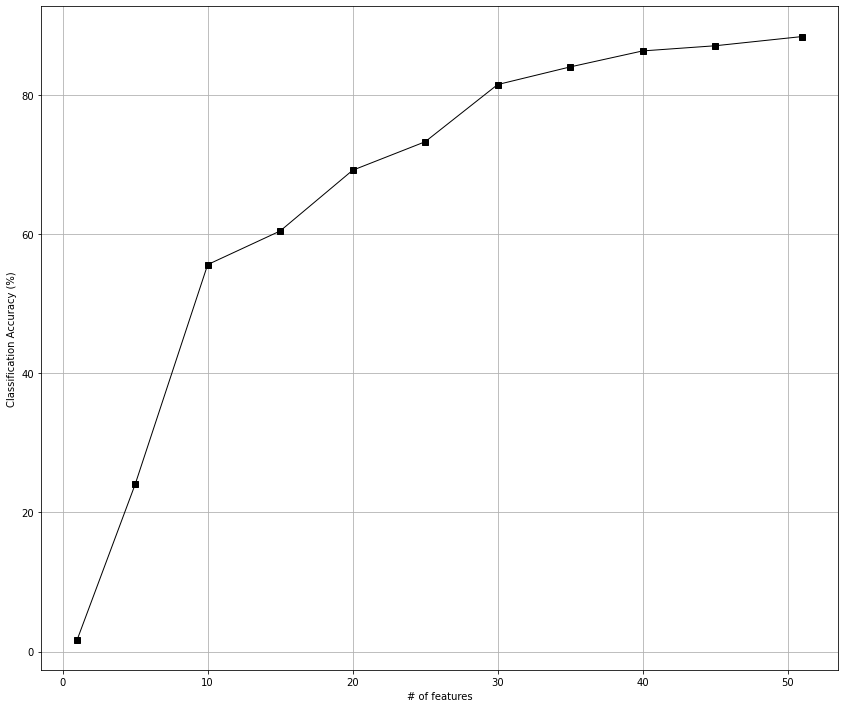

In [99]:
new_df = pd.DataFrame(prova, columns=num_pcs)
plt.figure(figsize=(12,10))
plt.grid()
plt.xlabel("# of features")
plt.ylabel("Classification Accuracy (%)")
plt.tight_layout()
plt.plot(new_df.mean(axis=0)*100, 'ks-', linewidth=1)
plt.savefig("classification_acc_10fold.png", format='png', dpi=500)
plt.show()

<AxesSubplot:xlabel='# of features', ylabel='Classification Accuracy (%)'>

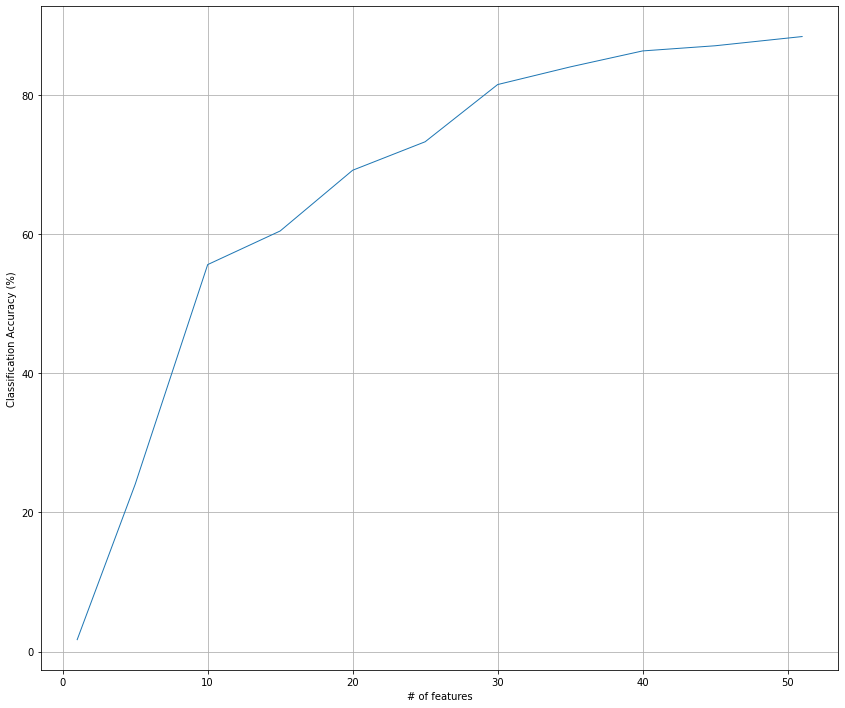

In [97]:
plt.figure(figsize=(12,10))
plt.grid()
plt.xlabel("# of features")
plt.ylabel("Classification Accuracy (%)")
plt.tight_layout()
sns.lineplot(data=new_df.mean(axis=0)*100, linewidth=1)